In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
PROJECT_PATH = '../'
import sys
sys.path.insert(0, PROJECT_PATH)

In [586]:
from PIML.box.boxWR import BoxWR

In [629]:
bb = BoxWR()

#220 R=1000.00
(2204,) (220,)
[128.62919766871838, 115.24443981899495, 96.37616636451567, 61.267167550332644, 48.639792170761794, 36.68562447562708, 29.777481232172207, 15.794917038940264, 7.933035575185611, 3.3719594206863754, 2.1329351053797425]
[105.32   7.07   5.2    1.44   1.21   0.76   0.57   0.49   0.35   0.28]
Building RBF with gaussan kernel on data shape (2880,)
Building RBF with gaussan kernel on data shape (2880, 10)


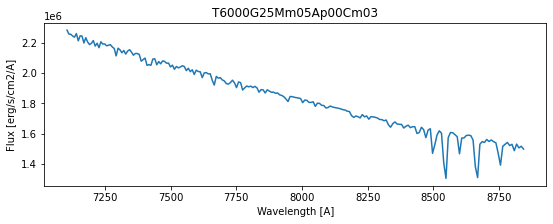

In [630]:
W="RedM"; R="R"; Res=5000;step=10;
bb.init(W,R, Res,step, onPCA=1)

In [615]:
giant_pmt=[-0.5,5000,0,0.0,0.0]
dwarf_pmt=[-0.5,5000,5,0.0,0.0]

In [616]:
# fdx = bb.Obs.get_fdx_from_pmt(pmt, bb.para)
# fluxGiant = bb.flux_H[fdx]
fdx = bb.Obs.get_fdx_from_pmt(dwarf_pmt, bb.para)
fluxDwarf = bb.flux_H[fdx]

Text(0.5, 0, 'wavelength $\\lambda$ [A]')

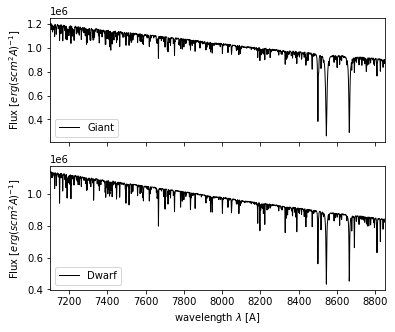

In [619]:
label="Giant"
f, axs = plt.subplots(2,1, figsize=(6,5), facecolor='w', sharex="col")
ax=axs[0]
ax.plot(bb.wave_H, fluxGiant,lw=1, c="k",alpha=1, label=label)
ax.legend(loc=3)
ax.set_ylabel(r'Flux [$erg  (s cm^2 A)^{-1}$]')
ax.set_xlim(7100,8850)
ax=axs[1]
ax.plot(bb.wave_H, fluxDwarf,lw=1, c="k",alpha=1, label="Dwarf")
ax.legend(loc=3)
ax.set_ylabel(r'Flux [$erg  (s cm^2 A)^{-1}$]')
ax.set_xlim(7100,8850)
ax.set_xlabel(r'wavelength $\lambda$ [A]')


Text(0.5, 0, 'wavelength $\\lambda$ [A]')

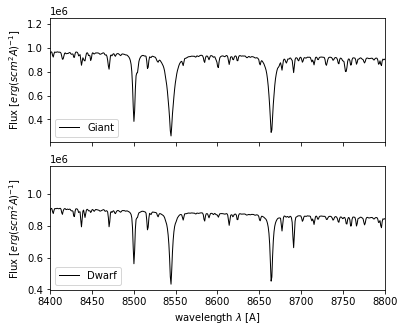

In [622]:
label="Giant"
f, axs = plt.subplots(2,1, figsize=(6,5), facecolor='w', sharex="col")
ax=axs[0]
ax.plot(bb.wave_H, fluxGiant,lw=1, c="k",alpha=1, label=label)
ax.legend(loc=3)
ax.set_ylabel(r'Flux [$erg  (s cm^2 A)^{-1}$]')
ax.set_xlim(8400,8800)
ax=axs[1]
ax.plot(bb.wave_H, fluxDwarf,lw=1, c="k",alpha=1, label="Dwarf")
ax.legend(loc=3)
ax.set_ylabel(r'Flux [$erg  (s cm^2 A)^{-1}$]')
ax.set_xlabel(r'wavelength $\lambda$ [A]')


In [631]:
sky = bb.Obs.load_sky_H()

In [632]:
s,e=np.digitize( [7100, 8850], sky[:,0])

In [633]:
s,e

(1359, 2018)

In [635]:
skyH = sky[s:e]

In [641]:
bb.flux_H.shape

(2880, 2204)

In [656]:
wave5, flux5 = bb.Obs.resample(bb.wave_H, np.array([bb.flux_H0]), step=5)

#440 R=2000.00


In [657]:
sky5 = bb.Obs.resampleSky(skyH, wave5, 0)

In [658]:
var5 = bb.Obs.get_var(flux5, sky5)
var5 = var5[0]

In [659]:
flux5.mean(),var5.mean()

(1356519.6818181819, 1372534.359209445)

In [661]:
step2 = 10
wave10, flux10 = bb.Obs.resample(wave5, flux5, step=step2)

#43 R=200.00


In [662]:
sky10_1 = bb.Obs.resampleSky(sky5, wave5, step=step2)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [491]:
sky10 = bb.Obs.resampleFlux_i(sky5, step2)

In [492]:
sky_RedM.shape, sky10.shape, sky10_1.shape, sky5.shape

((659, 2), (43,), (43,), (440,))

In [493]:
sky10.mean(), sky10_1.mean()

(1.4366657792037132, 14.366657792037133)

In [494]:
var10 = bb.Obs.get_var(flux10, sky10)
var10_1 = bb.Obs.get_var(flux10, sky10_1)

In [495]:
var10.mean(), var10_1.mean(), var5.mean()

(1375510.0410763966, 1375639.340996525, 1372534.359209445)

In [496]:
var10_1.mean()/ var5.mean()

1.0022622251794617

In [ ]:
var

array([[1630866.57067777, 1629987.61249109, 1621107.68619458,
        1618147.43165894, 1622607.20285354, 1622367.18146945,
        1591707.30440182, 1621447.1471    , 1603647.38744915,
        1607487.28751761, 1619347.42385132, 1617187.48528046,
        1610627.22840319, 1575607.30592909, 1610827.41129321,
        1607247.41971677, 1610587.4644143 , 1607967.47986578,
        1571907.27520907, 1608347.40375863, 1607087.30542094,
        1598067.47294649, 1590107.46628315, 1584987.33738382,
        1562407.44169137, 1589807.46126266, 1588887.36115136,
        1585347.45683757, 1592227.31139836, 1594367.52638962,
        1552367.46761244, 1590447.41343932, 1585407.55709464,
        1584827.53365481, 1560887.47988787, 1580127.62229102,
        1589707.59945562, 1586087.70311601, 1582529.15909363,
        1579529.84435228, 1577629.25967525, 1583328.48936877,
        1571787.65893939, 1580187.73683725, 1578967.66634586,
        1565267.57922195, 1575267.80451953, 1576568.62845938,
        

In [546]:
noise5_100 = bb.Obs.get_noise_N(var5, 100000)

In [499]:
obsflux = flux5 + noise5

In [501]:
bb.Obs.get_snr(obsflux)

0.8260779841060439

In [505]:
flux5.shape

(1, 440)

In [508]:
np.mean(flux5[0]/ var5 )

0.9881971567509134

In [500]:
obsflux

array([[1615328.00594946, 1612505.61580503, 1605702.02929129,
        1602984.00106738, 1605734.82671822, 1604255.19075769,
        1573348.29864782, 1606804.17746397, 1588683.620568  ,
        1591415.20855067, 1601712.26394861, 1602977.01492509,
        1593119.50966185, 1558289.59159571, 1593438.46396086,
        1589063.05345655, 1596166.67267905, 1588799.36347075,
        1556977.84984428, 1592191.28542917, 1591403.08927411,
        1580527.60525386, 1575971.53568083, 1570467.25643038,
        1545587.27817463, 1572904.33456079, 1573457.51746276,
        1572007.23528198, 1576788.88986478, 1579427.67164536,
        1536470.07680513, 1576979.43624993, 1569870.63132319,
        1569482.9296537 , 1545110.29442478, 1563730.93878456,
        1576010.94047596, 1571867.01400428, 1569747.84613509,
        1565298.59160608, 1560989.30640309, 1569406.67957792,
        1556273.75587468, 1564066.15322236, 1562999.80281404,
        1548679.34527678, 1560961.60786241, 1560222.5745535 ,
        

In [ ]:
var5.mean()

In [481]:
bb.Obs.get_snr(var10)

array([[1619627.55892676, 1622487.1921615 , 1606577.22575091,
        1605567.33748338, 1618267.45456589, 1593117.26716614,
        1609037.41550499, 1609277.47214004, 1590127.33948385,
        1602577.38918372, 1587547.40183348, 1576107.45147702,
        1587117.40899446, 1593297.41889399, 1571407.44052588,
        1585117.54537472, 1570507.55108945, 1587897.65128581,
        1581029.50172295, 1580478.87452201, 1575987.69788832,
        1572117.62278391, 1575918.21648945, 1570968.66054298,
        1564727.73972957, 1540528.73745782, 1562579.64542715,
        1556378.13138509, 1547228.36237806, 1553578.41840307,
        1542667.9138856 , 1552813.35312192, 1554568.73124143,
        1546918.06369251, 1538278.12415   , 1543168.0263485 ,
        1542348.33900077, 1539638.50587341, 1518388.20851881,
        1518598.11863868, 1524048.15961033, 1503228.50106125,
        1503868.80154168, 1501068.54464971, 1522008.41788399,
        1521038.44216867, 1499058.36167477, 1512588.48216841,
        

In [443]:
sky_RedM = bb.get_wave_in_Wrange(sky[:,0])

AttributeError: 'BoxWR' object has no attribute 'get_wave_in_Wrange'

In [438]:
sky

array([[3.2000e+03, 0.0000e+00],
       [3.4999e+03, 0.0000e+00],
       [3.5017e+03, 6.5060e-01],
       ...,
       [1.0990e+04, 2.5256e+00],
       [1.0995e+04, 2.5006e+00],
       [1.1000e+04, 2.8139e+00]])

In [412]:
sky.shape

(2511, 2)

In [415]:
sky_H = bb.Obs.resampleSky(sky, bb.wave_H, 0)


In [416]:
sky_H

array([8.30974414e+02, 1.46860769e-01, 1.46840085e-01, ...,
       4.55016593e-01, 4.68691036e-01, 4.73654769e-01])

In [406]:
bb.flux_H 

array([1616600., 1616500., 1615400., ..., 1130200., 1122400., 1124900.])

In [417]:
var_in_res = bb.Obs.get_var(bb.flux_H, sky_H)


In [421]:
var_M=bb.Obs.resampleFlux_i(var_in_res, bb.step)       


In [433]:
np.mean(bb.flux_M), np.mean(bb.flux_H), 

(1356519.6818181819, 1356544.328493648)

In [431]:
np.mean(obsvar), np.mean(var_M)

(1372549.0681949188, 1372522.6204558557)

In [427]:
var_M

array([1630421.51649867, 1619621.48214772, 1622481.4480113 ,
       1606571.44211369, 1605561.47958142, 1618261.47577084,
       1593111.45794378, 1609031.49700646, 1609271.47993373,
       1590121.4710844 , 1602571.47552043, 1587541.49051607,
       1576101.48218933, 1587111.48031149, 1593291.48461134,
       1571401.50028769, 1585111.50505147, 1570501.50587249,
       1587891.60522305, 1581021.90578609, 1580471.70988904,
       1575981.52863365, 1572111.53941035, 1575911.6829137 ,
       1570961.67911443, 1564721.55252897, 1540521.85775718,
       1562571.83441965, 1556371.62669156, 1547221.70158511,
       1553571.65027204, 1542661.57644917, 1552803.63225383,
       1554544.80428551, 1546911.59974638, 1538271.62112777,
       1543161.61634293, 1542341.68743024, 1539631.68409065,
       1518381.64061002, 1518591.62056223, 1524041.63726609,
       1503221.71488062, 1503861.76936475, 1501061.68750099,
       1522001.69062642, 1521031.68423332, 1499051.68209319,
       1512581.68280795,

In [420]:
var_in_res.shape

(2204,)

In [426]:
noise_level=1; N=1
obsfluxs, obsvar = bb.Obs.add_obs_to_flux_N(bb.flux_M, noise_level, N)


noise_level 1


In [410]:
obsfluxs

array([[1601027.18834226, 1624875.97745923, 1591649.66423688,
        1580295.82551493, 1576483.94165807, 1607499.95866574,
        1572346.0941731 , 1600344.46393605, 1584610.85520655,
        1560198.66265871, 1573532.99161116, 1549905.28701085,
        1563993.76703061, 1558626.78018078, 1579749.41831364,
        1550836.88232112, 1579065.66033848, 1556174.13109739,
        1547475.28566846, 1558176.55167405, 1555331.23767058,
        1573994.57027401, 1562511.9044455 , 1557368.44046773,
        1562924.99141007, 1548296.89541203, 1542647.68298875,
        1528260.49256931, 1542232.6803191 , 1510832.03477885,
        1535479.95259743, 1522608.95801378, 1549275.96514168,
        1550097.70695709, 1524133.21293041, 1505354.93916417,
        1510210.07302689, 1503441.69790175, 1513594.31498389,
        1503401.38555187, 1500780.88407362, 1498357.30699839,
        1480380.86499485, 1496417.161145  , 1485963.06161222,
        1508750.19815571, 1498180.90253144, 1493463.29256112,
        

In [407]:
bb.flux_M

array([1614420., 1603620., 1606480., 1590570., 1589560., 1602260.,
       1577110., 1593030., 1593270., 1574120., 1586570., 1571540.,
       1560100., 1571110., 1577290., 1555400., 1569110., 1554500.,
       1571890., 1565020., 1564470., 1559980., 1556110., 1559910.,
       1554960., 1548720., 1524520., 1546570., 1540370., 1531220.,
       1537570., 1526660., 1536800., 1538540., 1530910., 1522270.,
       1527160., 1526340., 1523630., 1502380., 1502590., 1508040.,
       1487220., 1487860., 1485060., 1506000., 1505030., 1483050.,
       1496580., 1484650., 1496300., 1494530., 1489320., 1487280.,
       1471560., 1483050., 1462340., 1474740., 1467830., 1473070.,
       1476040., 1473210., 1457810., 1467390., 1454590., 1460500.,
       1441450., 1459420., 1455580., 1453930., 1429770., 1448780.,
       1448860., 1445540., 1443850., 1428840., 1400020., 1436050.,
       1431860., 1431520., 1425680., 1414190., 1406620., 1402400.,
       1410210., 1418610., 1412090., 1388900., 1412050., 14095

In [286]:
pmt= bb.PhyMid
snr = 10
obsflux, obsvar = bb.make_obs_from_pmt(pmt, snr, N=2, plot=0)

noise_level 173.70903600691972


In [287]:
pmt2

array([-2.00e+00,  8.25e+03,  2.50e+00, -2.50e-01,  0.00e+00])

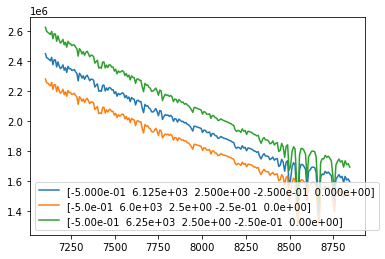

In [288]:
pmt2 = np.copy(bb.PhyMid)
pmt2[1]+=250
bb.test_rbf(bb.PhyMid, pmt2)

noise_level 269.60787202138283


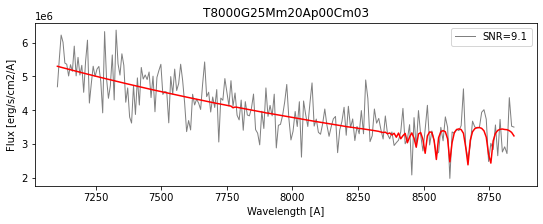

In [627]:
snr =10
obsflux, obsvar = bb.make_obs_from_pmt(bb.PhyMid, snr, plot=1)

Fitting with Template T8000G25Mm20Ap00Cm03
estimate 7836.689567565918


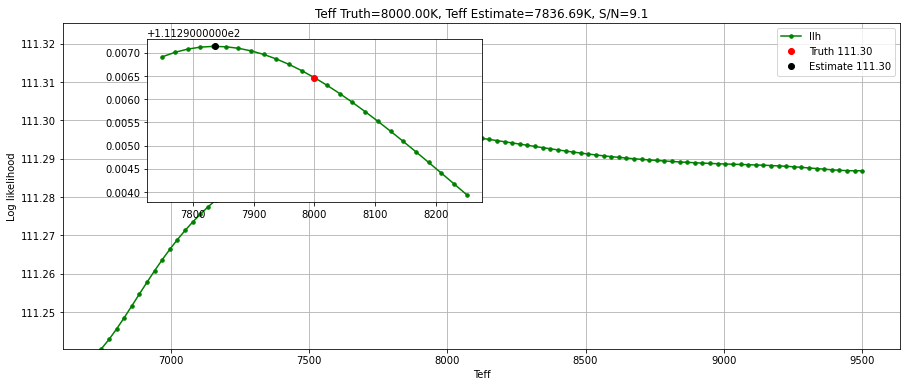

In [628]:
temp_pmt = bb.PhyMid
_=bb.LLH.eval_pmt_on_axis(temp_pmt, temp_pmt[1], obsflux, obsvar, axis="T")

Fitting with Template T6000G25Mm05Ap00Cm03
estimate -0.5751953125000002


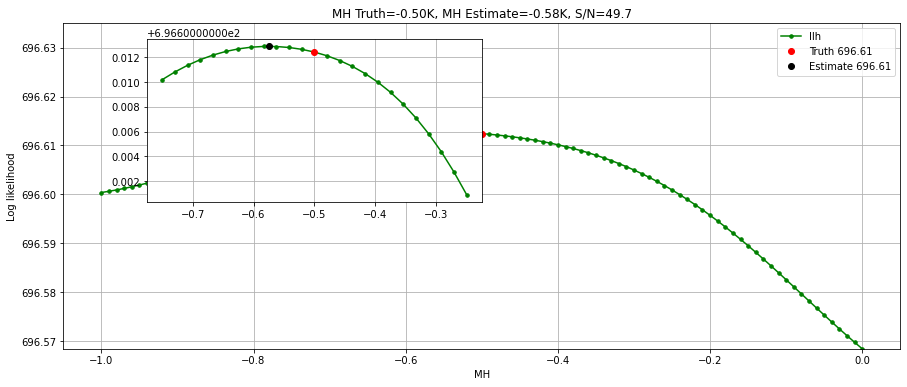

In [291]:
_=bb.LLH.eval_pmt_on_axis(temp_pmt, temp_pmt[0], obsflux, obsvar, axis="M")

Fitting with Template T6000G25Mm05Ap00Cm03
estimate 2.57452392578125


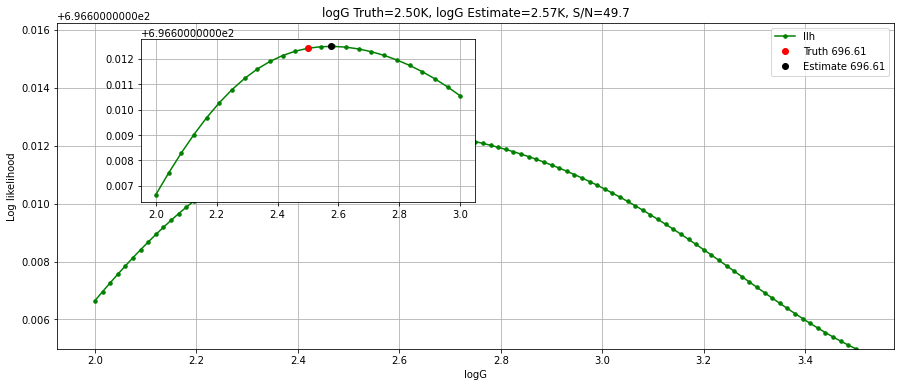

In [292]:
_=bb.LLH.eval_pmt_on_axis(temp_pmt, temp_pmt[2], obsflux, obsvar, axis="G")

100%|██████████| 10/10 [00:58<00:00,  5.90s/it]


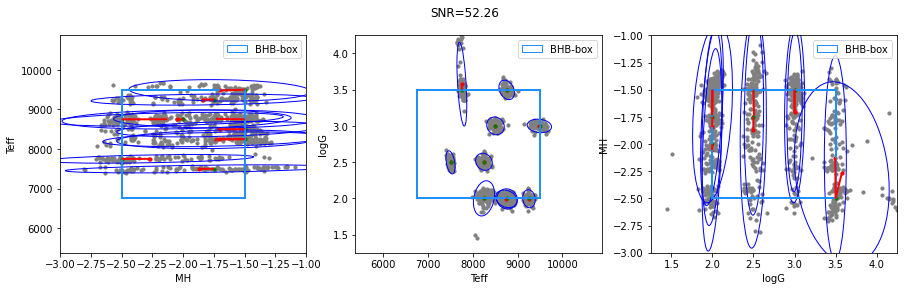

In [43]:
bb.eval_LLH_snr(snr, N_pmt=10, N_obs=100)

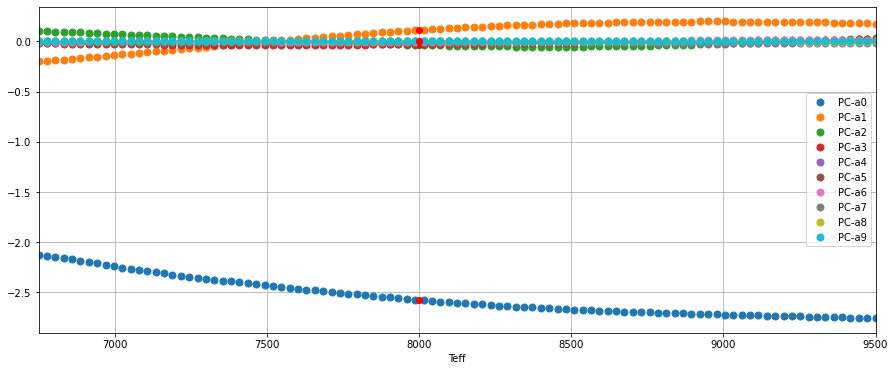

In [45]:
adx=1
bb.plot_coeff_on_pmt(bb.rbf_coeff, axis="T", fn_name="")

In [382]:
COEFF, coeff, bias, snr,  obsflux0, obsvar, A = bb.eval_coeff_bias(bb.PhyMid, snr=10, N_obs=10000, plot=0)

noise_level 173.70903600691972
A = 1836582.8875662684, dA = -55.992062729783356
diff = [-0.03229878  0.00216756  0.00147983  0.00145391 -0.00093416 -0.00231386
 -0.00113471  0.00011686  0.0004895  -0.00104255]
diff_log(1+x) = [-1.25881727e-01  2.93190740e-03 -3.04120329e-04  1.35739045e-03
 -9.73159817e-04 -2.77616903e-03 -2.26678736e-03 -8.49132675e-04
 -9.75695853e-05 -1.44095381e-03]


In [383]:
bias[0]

array([ 1.24068018e-01, -1.87488315e-03,  2.28230077e-03,  4.88968420e-04,
        1.14620443e-04,  7.80855460e-04,  1.86568765e-03,  1.87085256e-03,
        9.41742177e-04,  7.92882560e-04])

In [384]:
bias[1]

array([ 1.61778617e-02, -6.09956870e-04,  2.61738532e-04,  2.16793295e-04,
        4.14514933e-05,  1.73032044e-04,  3.98252144e-04,  4.93801718e-04,
        1.92262125e-04,  2.15562781e-04])

In [391]:
for i in [0,1]:
    print(f"{bias[1][i]:.4f}")

0.0162
-0.0006


In [386]:
COEFF.mean(0) - coeff

array([-0.01612092,  0.0015576 ,  0.00174157,  0.0016707 , -0.00089271,
       -0.00214083, -0.00073646,  0.00061066,  0.00068176, -0.00082698])

In [435]:
bb.flux_H.shape

(2204,)

In [436]:
ff = [1,2,3,4,1,2]

In [437]:
np.cumsum(ff)

array([ 1,  3,  6, 10, 11, 13])

In [336]:
normflux = bb.get_model(pmt, norm=1)
normflux.mean()

1.0080759421999599

In [338]:
nu = obsflux0 - A*normflux
nu[:10]

array([-360.65522106,   57.30485205,  -89.72347792, -155.9337101 ,
        105.10400804,  464.50400444,  411.53445262, -169.70240802,
       -692.73290308, -100.07660629])

In [361]:
am = A*normflux

In [364]:
b2 = 0.5*(obsvar / am**2).dot(bb.eigv.T)

In [369]:
b2 + coeff - COEFF.mean(0)

array([-2.83683639e-04,  1.96128009e-04, -1.51400915e-04, -5.18499463e-04,
       -6.58827608e-05,  8.98864827e-05,  1.32013294e-04, -1.69821256e-05,
        2.26789587e-04,  2.35675571e-04])

array([-1.89156840e+00, -1.31518929e-02, -3.71201375e-02,  1.06865797e-02,
        1.71807673e-03, -3.80288562e-03, -1.14407551e-02,  1.07023177e-03,
       -6.99626404e-03,  7.20828125e-04])

In [358]:
sigma = obsvar**0.5

In [360]:
sigma/9.039701845474356

array([1515.8102054 , 1507.01099502, 1506.44122949, 1503.18661265,
       1500.50869741, 1508.46566647, 1492.30026185, 1503.26327864,
       1502.93397713, 1487.73694631, 1499.14314452, 1489.81313481,
       1484.02560914, 1486.74300271, 1492.96818021, 1480.88411313,
       1487.1195038 , 1477.03731051, 1490.39614169, 1485.25279099,
       1485.62131376, 1481.57803033, 1482.36768922, 1483.78958264,
       1478.89558328, 1475.2179078 , 1458.70523472, 1475.92215321,
       1472.35273217, 1465.90311987, 1471.00461988, 1462.82860949,
       1469.55162573, 1472.68051813, 1466.97405608, 1460.21205069,
       1464.1065051 , 1463.99476547, 1461.9404132 , 1446.36974654,
       1450.42729634, 1453.71317658, 1437.55446462, 1438.72598439,
       1437.3972987 , 1451.48125553, 1452.03431578, 1438.53999496,
       1445.86613406, 1441.01285015, 1447.21823057, 1446.13080854,
       1441.91942374, 1442.35711083, 1433.72064967, 1437.84461476,
       1427.94497367, 1434.77461035, 1431.44845443, 1433.42592

In [346]:
x =  (nu/(A*normflux))
x.mean()

7.093378159743353e-06

In [354]:
obsflux0

array([2281304.75859549, 2255124.62247706, 2253260.97432171,
       2243399.637598  , 2235616.65920302, 2259918.41320693,
       2211357.02653987, 2243615.81243377, 2242103.00736418,
       2197246.43397531, 2230856.9211016 , 2203644.68718025,
       2186212.47783591, 2193779.43959741, 2213399.07617913,
       2176325.81746847, 2195213.53076976, 2165570.22203457,
       2205790.0372024 , 2189070.04493575, 2191016.62865753,
       2178539.2531306 , 2181323.52338427, 2185589.89301399,
       2171726.46500815, 2160423.23962651, 2112309.0630238 ,
       2162206.15306328, 2151125.42048919, 2132456.50840125,
       2148286.87396269, 2124068.13174946, 2143135.61533249,
       2152338.9507913 , 2136243.70531333, 2115781.804675  ,
       2127703.73598925, 2127054.32031662, 2120862.65337084,
       2075800.32203442, 2087746.03548868, 2097577.10843648,
       2050767.22781144, 2054117.45262499, 2051189.43423049,
       2091631.54497894, 2091461.71147235, 2052451.56514022,
       2074817.60700905,

In [353]:
obsvar**0.5

array([13702.47231117, 13622.93007281, 13617.77956234, 13588.35879645,
       13564.15124115, 13636.079869  , 13489.94943107, 13589.05183415,
       13586.07504667, 13448.69841917, 13551.80705017, 13467.46654413,
       13415.14903767, 13439.71346537, 13495.98721389, 13386.75085039,
       13443.11692294, 13351.9769017 , 13472.73675248, 13426.24239568,
       13429.57373166, 13393.02365499, 13400.16193593, 13413.01542848,
       13368.77513348, 13335.53004359, 13186.26040227, 13341.89621214,
       13309.62971022, 13251.32713801, 13297.44317703, 13223.53448078,
       13284.30854317, 13312.59279749, 13261.00808204, 13199.88156939,
       13235.08627609, 13234.07618322, 13215.5054512 , 13074.75126702,
       13111.43030743, 13141.1336851 , 12995.06374679, 13005.65393625,
       12993.6430137 , 13120.95778429, 13125.95728405, 13003.97264726,
       13070.19876037, 13026.32652087, 13082.42130969, 13072.59133876,
       13034.52167579, 13038.47823662, 12960.4072027 , 12997.68661752,
      

In [347]:
diff0= np.log(1+x).dot(bb.eigv.T)

In [348]:
diff = COEFF.mean(0) - coeff

In [349]:
diff

array([ 3.27494774e-04, -1.97779828e-04,  1.52109727e-04,  5.19086559e-04,
        6.59950152e-05, -8.94178960e-05, -1.30934791e-04,  1.83193860e-05,
       -2.26268923e-04, -2.35091807e-04])

In [350]:
diff0

array([ 3.70337740e-04, -1.99233360e-04,  1.51262574e-04,  5.19170311e-04,
        6.66051586e-05, -8.79705436e-05, -1.27790253e-04,  2.06687378e-05,
       -2.26499512e-04, -2.34934920e-04])

In [351]:
diff0 - diff

array([ 4.28429653e-05, -1.45353265e-06, -8.47152957e-07,  8.37525356e-08,
        6.10143367e-07,  1.44735239e-06,  3.14453781e-06,  2.34935178e-06,
       -2.30589020e-07,  1.56887131e-07])

In [355]:
bias

(array([ 6.45641652e-03, -9.75676629e-05,  1.18769403e-04,  2.54455890e-05,
         5.96477108e-06,  4.06351950e-05,  9.70891350e-05,  9.73579138e-05,
         4.90076319e-05,  4.12610772e-05]),
 array([ 8.76222716e-05, -3.30363847e-06,  1.41762398e-06,  1.17419232e-06,
         2.24508904e-07,  9.37173344e-07,  2.15700678e-06,  2.67452083e-06,
         1.04132699e-06,  1.16752762e-06]))

In [356]:
bias[0] + 0.5*bias[1]

array([ 6.50022765e-03, -9.92194822e-05,  1.19478215e-04,  2.60326851e-05,
        6.07702553e-06,  4.11037816e-05,  9.81676384e-05,  9.86951742e-05,
        4.95282954e-05,  4.18448410e-05])

In [ ]:
array([ 3.27494774e-04, -1.97779828e-04,  1.52109727e-04,  5.19086559e-04,
        6.59950152e-05, -8.94178960e-05, -1.30934791e-04,  1.83193860e-05,
       -2.26268923e-04, -2.35091807e-04])

In [155]:
A = 0.9998387144401806

In [180]:
obsflux0 = obsfluxs.mean(0)

In [181]:
nu = obsflux0 - fluxI

In [182]:
nu

array([ -5384.98497304,   1406.50435665, -38027.27894212, -13585.33901925,
       -24413.0239646 ,   9617.58518847,  -9095.16824336,   1850.55999118,
        -4610.07439337,  -3158.62922882,   -825.28903022,  16230.15175452,
       -10315.58770283,   1489.52168355, -16337.32739538,  -1150.65694569,
        19445.89130592,  17623.79163149,  10398.26934625,  23035.84908169,
        -6738.20312799,  -3351.70680698,  29600.39698587,  23817.9570654 ,
         1373.97671846,  19615.0878446 ,  10716.84472248,   5951.43632905,
        10216.59530029,  24327.62730131,   9344.05773313,  -8788.20649114,
        -3167.13860362, -21279.50121169,  -3726.66541326, -18700.0825491 ,
        -6286.54347035, -11860.87336741,   1414.21498119,  20926.79834232,
       -14824.91084572, -18781.27472898, -21841.18638133,  -2087.2012791 ,
       -12301.69018605,  13167.21670619,   1821.05130889, -20145.73243772,
         2194.31442805,  -7599.24793115,   9310.24448169,   9834.05461731,
        -1124.43854993,  

In [183]:
obsvar**0.5

array([446755.9819848 , 446099.85031484, 445442.23164317, 444890.74301003,
       444268.84337247, 443648.38181414, 443021.40325927, 442409.3340253 ,
       441784.3062699 , 441171.07833279, 440557.17803168, 439935.74152696,
       439318.5752924 , 438706.86882853, 438098.05632626, 437480.8272047 ,
       436848.22830037, 436201.32933375, 435646.57072421, 435033.39573042,
       434418.59488813, 433807.22853733, 433203.79953979, 432593.04044023,
       431990.81809696, 431383.90325722, 430756.65858472, 430171.66324614,
       429545.95368501, 428913.74621876, 428331.60852466, 427763.44340321,
       427150.81884844, 426556.0441667 , 425952.51388422, 425335.49830639,
       424753.41905925, 424155.22846543, 423558.49622201, 422953.5101968 ,
       422364.74801741, 421770.55948054, 421169.88186342, 420560.53011491,
       419964.69373956, 419376.69947331, 418795.41482546, 418194.49687932,
       417595.62316495, 416960.27151721, 416414.26417701, 415849.14736812,
       415248.42347734, 4

In [164]:
(nu/(A * fluxI)).dot( bb.eigv.T)

array([ 4.14129304e-07,  5.94559339e-08,  4.89888519e-08,  1.97464571e-07,
       -1.41788528e-07,  1.66905350e-07, -2.86191558e-07, -1.67916165e-07,
       -1.64732727e-09,  5.66429724e-08])

In [145]:
pmt = bb.PhyMid
fluxI = bb.get_model(pmt, onGrid=0)

In [146]:
flux0

array([5296360., 5280750., 5265270., 5251700., 5237120., 5222670.,
       5206910., 5193380., 5178730., 5163760., 5149870., 5135160.,
       5120150., 5106410., 5092280., 5077510., 5063430., 5048220.,
       5035340., 5021080., 5006930., 4992650., 4978900., 4964850.,
       4950810., 4936870., 4922050., 4909210., 4894950., 4880520.,
       4867270., 4853720., 4840300., 4826820., 4813110., 4799210.,
       4785950., 4772450., 4758940., 4745040., 4731820., 4718670.,
       4704320., 4691090., 4677550., 4665240., 4652210., 4638380.,
       4625540., 4611440., 4599310., 4586790., 4573500., 4560870.,
       4547330., 4534960., 4520810., 4509040., 4496410., 4483670.,
       4471050., 4458340., 4445430., 4432960., 4420240., 4407760.,
       4394900., 4382800., 4370260., 4357850., 4345020., 4333050.,
       4320740., 4308360., 4296140., 4283250., 4270630., 4259410.,
       4247160., 4235040., 4222840., 4210780., 4196750., 4186870.,
       4174970., 4163110., 4151010., 4139090., 4127530., 41156

In [148]:
fluxI

array([5296171.50497484, 5280579.73756753, 5264975.62563011,
       5251907.30928348, 5237189.48376436, 5222526.61975131,
       5207730.70098582, 5193306.2437511 , 5178597.54598149,
       5164186.66273867, 5149779.89623845, 5135216.60025797,
       5120773.95520652, 5106479.0205127 , 5092271.42997209,
       5077887.452452  , 5063166.45197408, 5048134.74966788,
       5035260.82781716, 5021048.42800238, 5006823.40979057,
       4992697.67388696, 4978772.94545937, 4964697.47896368,
       4950839.64441471, 4936894.58915979, 4922498.65919632,
       4909094.3507043 , 4894779.12576511, 4880333.55771803,
       4867052.07204697, 4854107.00317086, 4840146.86998374,
       4826620.84140225, 4812958.8847477 , 4798978.73369947,
       4785808.98563264, 4772292.74377883, 4758829.17425984,
       4745199.13251033, 4731953.08965536, 4718603.3024215 ,
       4705126.21869911, 4691474.38503087, 4678145.8117031 ,
       4665010.35004907, 4652042.96237079, 4638656.45509515,
       4625334.5819893 ,

In [124]:
noise_level=100; N=2
obsflux0, obsvar = bb.Obs.add_obs_to_flux_N(flux0, noise_level, N)

In [128]:
obsflux0.mean(1).mean()

3980204.4554053093

In [120]:
obsflux0 = obsflux0[0]

In [122]:
obsflux0.mean() / flux0.mean()

0.9987587432304191

ValueError: too many values to unpack (expected 3)

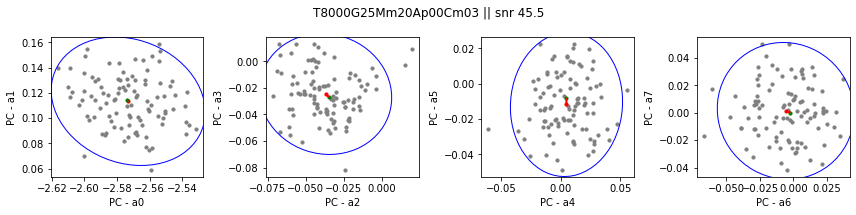

In [85]:
coeff, COEFF,snr=bb.eval_coeff_bias(bb.PhyMid, snr=50, N_obs=100, plot=1)

100%|██████████| 10/10 [00:00<00:00, 170.57it/s]


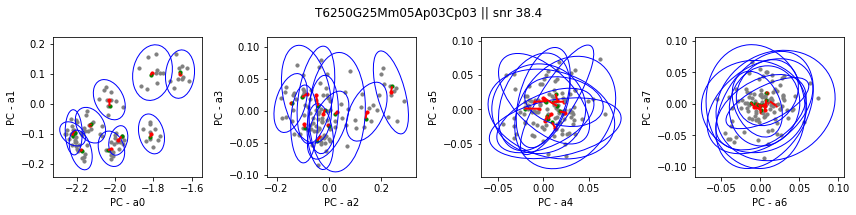

In [441]:
bb.eval_coeff_snr(snr, pmts=None, N_pmt=10, N_obs=10, N_plot =None)

100%|██████████| 10/10 [00:00<00:00, 48.50it/s]


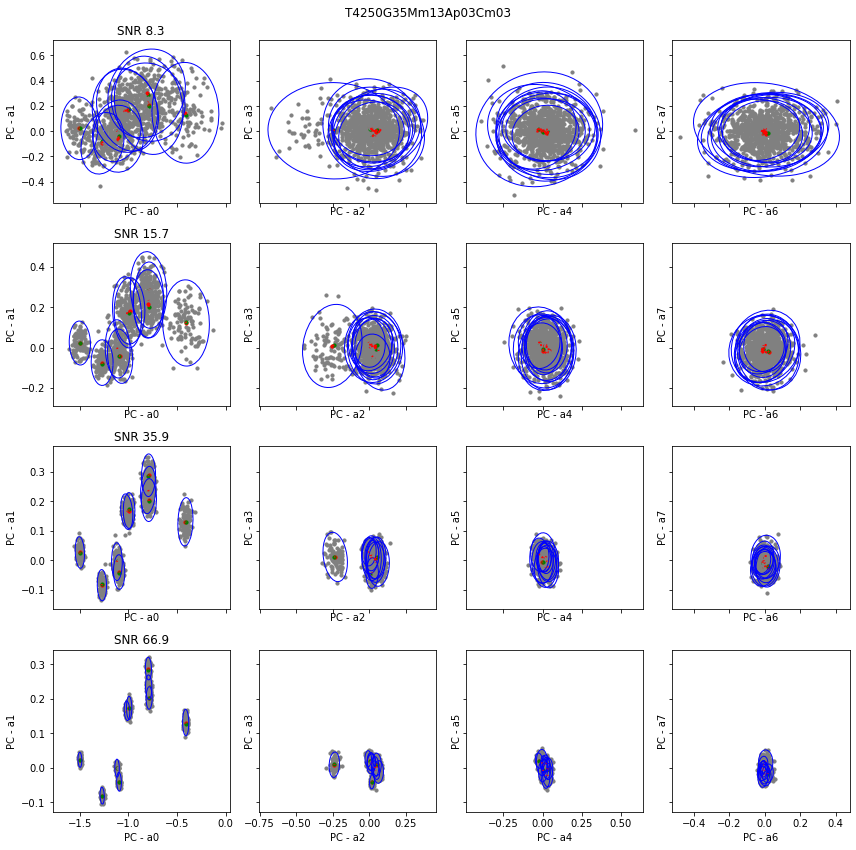

In [9]:
fns, SNRs, pmts = bb.eval_coeff(snrList=[10,20,50,100], N_obs=100)

In [461]:
pmts

array([[-7.50e-01,  6.00e+03,  3.50e+00,  5.00e-01, -2.50e-01],
       [-5.00e-01,  5.75e+03,  2.50e+00,  5.00e-01,  2.50e-01],
       [-7.50e-01,  6.75e+03,  3.50e+00, -7.50e-01,  2.50e-01],
       [-7.50e-01,  6.75e+03,  2.50e+00,  0.00e+00,  5.00e-01],
       [-5.00e-01,  6.75e+03,  2.00e+00, -5.00e-01,  2.50e-01],
       [-2.50e-01,  6.50e+03,  3.00e+00, -2.50e-01,  0.00e+00],
       [-1.00e+00,  6.50e+03,  3.50e+00, -2.50e-01,  2.50e-01],
       [-5.00e-01,  5.50e+03,  3.50e+00,  0.00e+00,  2.50e-01],
       [-1.00e+00,  6.25e+03,  2.50e+00,  2.50e-01,  2.50e-01],
       [-5.00e-01,  6.25e+03,  2.50e+00,  2.50e-01,  2.50e-01]])

In [19]:
COEFF, coeff, SNR = bb.eval_coeff_bias(pmts[0], snr=10, N_obs=1000, plot=0, N_plot=None)
diff = (COEFF - coeff)
diff.mean(0)

array([-0.00652198,  0.00609643, -0.00224622, -0.00645834,  0.01033811,
        0.00292413,  0.00089567, -0.01292055, -0.00097376, -0.00581477])

In [20]:
COEFF, coeff, SNR = bb.eval_coeff_bias(pmts[0], snr=100, N_obs=1000, plot=0, N_plot=None)
diff = (COEFF - coeff)
diff.mean(0)

array([ 2.07310662e-05,  4.43922625e-04, -1.51224876e-04, -1.78096139e-04,
        2.40423022e-04,  2.68960688e-05,  5.14172072e-04, -2.01962545e-04,
        4.98614130e-04, -4.26554726e-04])

In [16]:
coeff

array([-0.41175478,  0.12837556, -0.23967455,  0.01160943, -0.00432388,
        0.0129761 ,  0.00552435,  0.01776728,  0.0226101 ,  0.03133828])

In [18]:
diff.mean(0), 

(array([ 0.0007504 ,  0.00245126,  0.00205708, -0.0039153 ,  0.00091699,
         0.00767703,  0.00107148,  0.00287752, -0.00201799, -0.00343387]),)

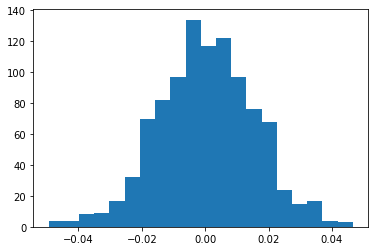

In [14]:
_=plt.hist(diff[:,0], bins=20)

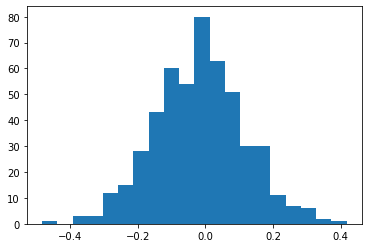

In [488]:
_=plt.hist(diff[:,0], bins=20)

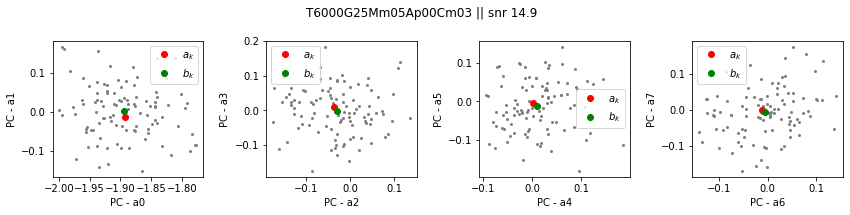

In [430]:
coeff, COEFF,snr=bb.eval_coeff_bias(bb.PhyMid, snr=20, N_obs=100, plot=1)

In [403]:
coeff

array([-1.89189589e+00, -1.29541130e-02, -3.72722472e-02,  1.01674931e-02,
        1.65208172e-03, -3.71346772e-03, -1.13098203e-02,  1.05191238e-03,
       -6.76999511e-03,  9.55919932e-04])

In [ ]:
idx1, idx2 = 1,2

Text(0, 0.5, 'bias at noise_level=0')

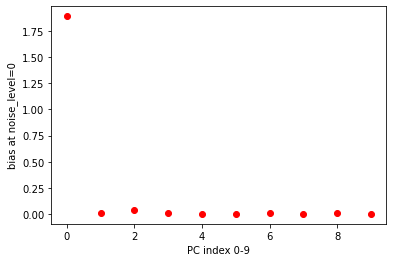

In [395]:
plt.plot(abs(COEFF[0]), "ro")
plt.xlabel("PC index 0-9")
plt.ylabel("bias at noise_level=0")

In [410]:
bb.topk=10

In [ ]:
bb.evel

#220 R=1000.00
(2204,) (220,)


ValueError: A value in x_new is below the interpolation range.

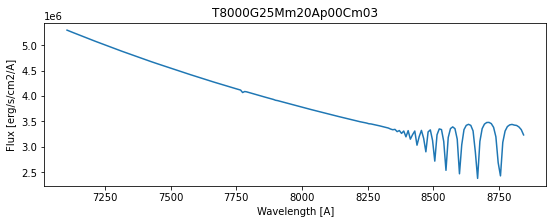

In [549]:
R="B"; 
W="RedM"; Res=5000;step=10;
b= BoxWR()
b.init(W,R, Res,step)

In [530]:
var_in_res = b.Obs.get_var(b.flux0, b.Obs.sky_in_res)
noise      = b.Obs.get_noise(var_in_res)

In [546]:
noise_level=2
for noise_level in [2,5,10,20,30,40,50,100,200]:
    ssobs = b.flux0 + noise_level * noise
    sn    = b.Obs.get_snr(ssobs)
    print(noise_level, sn)

2 637.6710717010985
5 263.03658001232645
10 133.0426785326838
20 72.1572955283795
30 50.02242009176585
40 38.851005797793604
50 31.84562559226263
100 16.799505251661135
200 8.645738898259687


In [543]:
sn

637.6710717010985

In [526]:
 snr = 100
obsfluxs, obsvar = b.make_obs_from_pmt(pmt, snr, N=1)

  0%|          | 0/10 [00:00<?, ?it/s]


ValueError: A value in x_new is below the interpolation range.

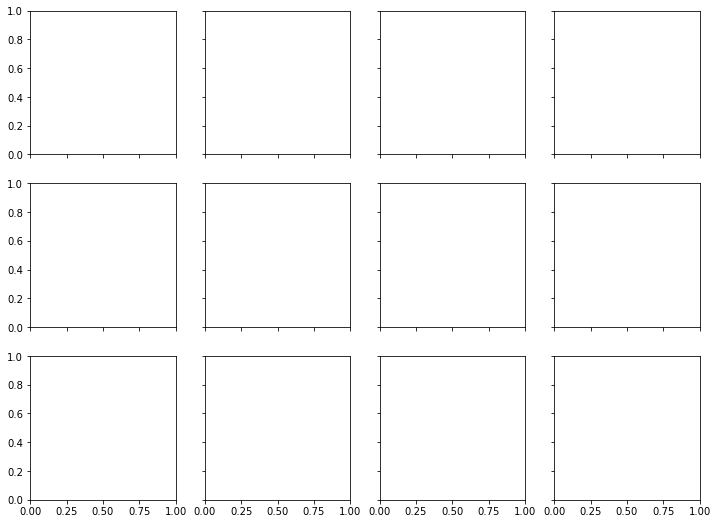

In [548]:
_= b.eval_coeff(snrList=[10,20,50], N_obs=100)

In [ ]:
COEFF, coeff, SNR = bb.eval_coeff_bias(pmts[0], snr=10, N_obs=1000, plot=0, N_plot=None)
diff = COEFF - coeff
diff.mean(0)

In [ ]:
COEFF, coeff, SNR = bb.eval_coeff_bias(pmts[0], snr=100, N_obs=1000, plot=0, N_plot=None)
diff = COEFF - coeff
diff.mean(0)

In [ ]:
_=plt.hist(diff[:,0], bins=20)

100%|██████████| 10/10 [00:34<00:00,  3.42s/it]


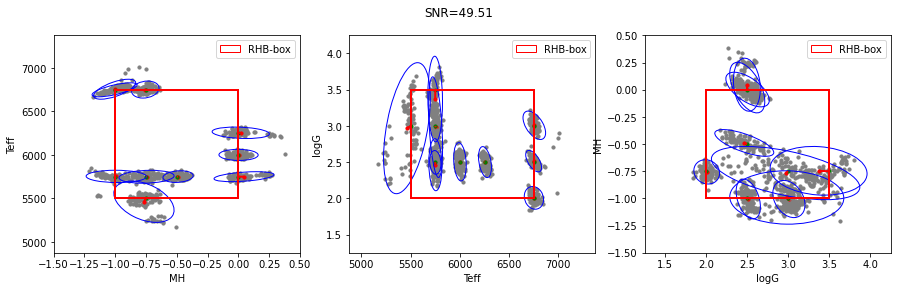

In [294]:
snr = 50
bb.eval_LLH_snr(snr, N_pmt=10, N_obs=100)

100%|██████████| 10/10 [01:40<00:00, 10.01s/it]


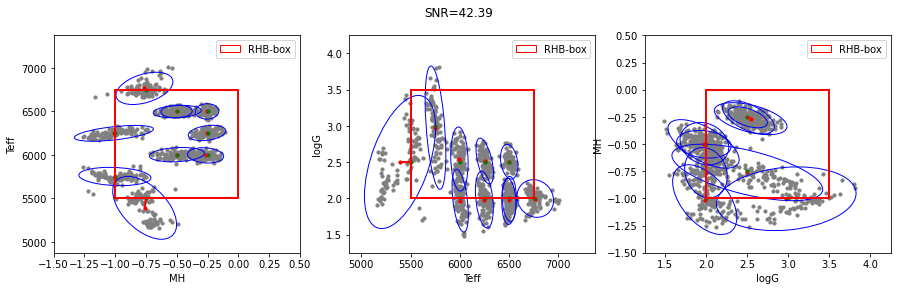

In [195]:
snr = 50
bR.eval_LLH_snr(snr, N_pmt=10, N_obs=100)

100%|██████████| 10/10 [01:46<00:00, 10.67s/it]


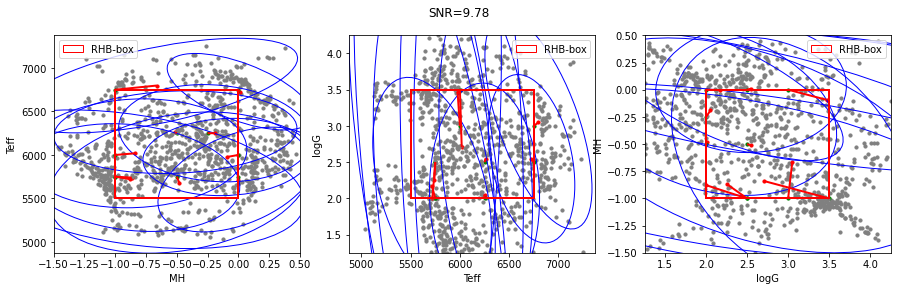

In [196]:
snr = 10
bR.eval_LLH_snr(snr, N_pmt=10, N_obs=100)

100%|██████████| 10/10 [00:56<00:00,  5.67s/it]


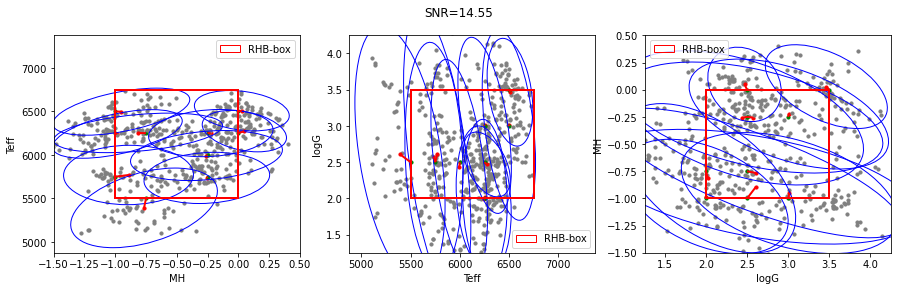

In [197]:
snr = 20
bR.eval_LLH_snr(snr, N_pmt=10, N_obs=50)

#220 R=1000.00
(2204,) (220,)
Building RBF with gaussan kernel on data shape (7776, 220)


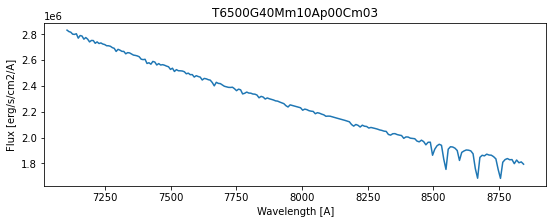

In [198]:
R="W"; 
W="RedM"; Res=5000;step=10;
bW = BoxWR()
bW.init(W,R, Res,step)

100%|██████████| 10/10 [02:27<00:00, 14.71s/it]


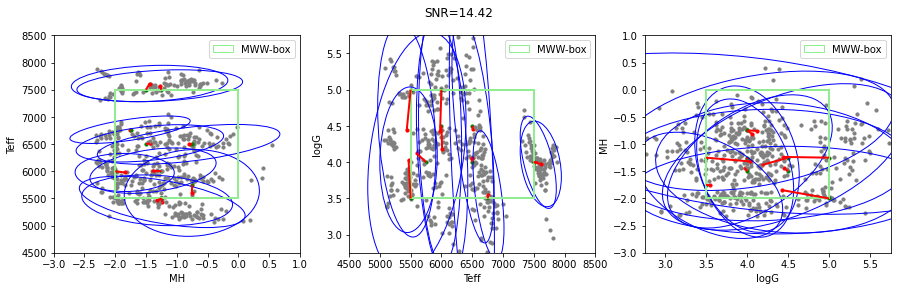

In [200]:
snr = 20
bW.eval_LLH_snr(snr, N_pmt=10, N_obs=50)

100%|██████████| 10/10 [02:44<00:00, 16.43s/it]


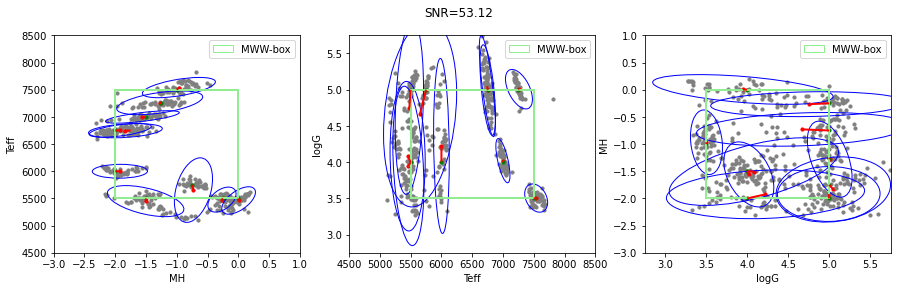

In [201]:
snr = 50
bW.eval_LLH_snr(snr, N_pmt=10, N_obs=50)

#220 R=1000.00
(2204,) (220,)
Building RBF with gaussan kernel on data shape (5760, 220)


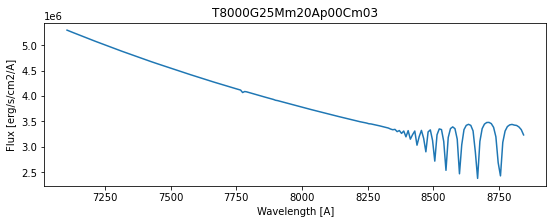

In [202]:
R="B"; 
W="RedM"; Res=5000;step=10;
bB = BoxWR()
bB.init(W,R, Res,step)

100%|██████████| 10/10 [01:56<00:00, 11.60s/it]


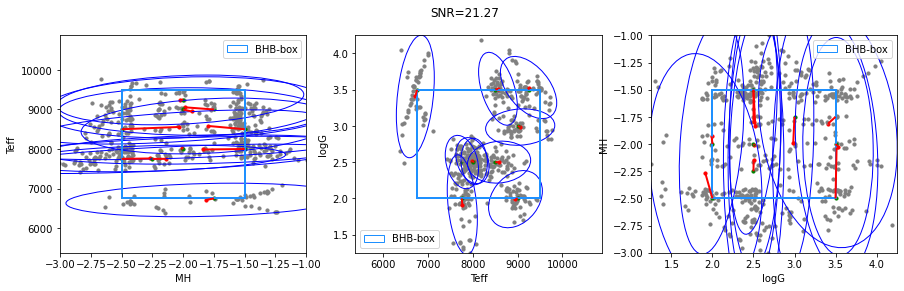

In [203]:
snr = 20
bB.eval_LLH_snr(snr, N_pmt=10, N_obs=50)

100%|██████████| 10/10 [01:59<00:00, 11.95s/it]


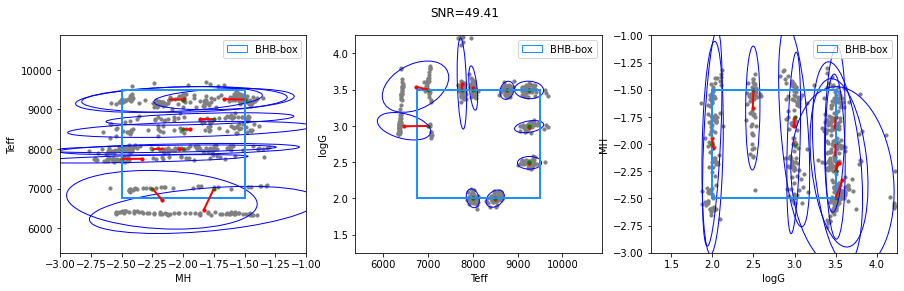

In [204]:
snr = 50
bB.eval_LLH_snr(snr, N_pmt=10, N_obs=50)